<a href="https://colab.research.google.com/github/riyakb/Autoencoders-for-MNIST/blob/master/deep_autoencoder_for_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Using TensorFlow backend.


In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inp_dim=x_train.shape[1]
enc_dim_1=256
enc_dim_2=128
enc_dim_3=64
enc_dim_4=32
enc_func='selu'
dec_func='sigmoid'
opt='adadelta'
los='binary_crossentropy'
no_of_epochs=50
batch=256

In [0]:
inp = Input(shape=(inp_dim,))
enc_1 = Dense(enc_dim_1, activation=enc_func)(inp)
enc_2 = Dense(enc_dim_2, activation=enc_func)(enc_1)
enc_3 = Dense(enc_dim_3, activation=enc_func)(enc_2)
enc_4 = Dense(enc_dim_4, activation=enc_func)(enc_3)


dec_1 = Dense(enc_dim_3, activation=enc_func)(enc_4)
dec_2 = Dense(enc_dim_2, activation=enc_func)(dec_1)
dec_3 = Dense(enc_dim_1, activation=enc_func)(dec_2)
dec_4 = Dense(inp_dim, activation=dec_func)(dec_3)

autoencoder = Model(inp, dec_4)

In [0]:
encoder_1 = Model(inp, enc_1)
enc_inp_2 = Input(shape=(enc_dim_1,))
enc_layer_2 = autoencoder.layers[2]
encoder_2 = Model(enc_inp_2, enc_layer_2(enc_inp_2))
enc_inp_3 = Input(shape=(enc_dim_2,))
enc_layer_3 = autoencoder.layers[3]
encoder_3 = Model(enc_inp_3, enc_layer_3(enc_inp_3))
enc_inp_4 = Input(shape=(enc_dim_3,))
enc_layer_4 = autoencoder.layers[4]
encoder_4 = Model(enc_inp_4, enc_layer_4(enc_inp_4))
dec_inp_1 = Input(shape=(enc_dim_4,))
dec_layer_1 = autoencoder.layers[5]
decoder_1 =Model(dec_inp_1, dec_layer_1(dec_inp_1))
dec_inp_2 = Input(shape=(enc_dim_3,))
dec_layer_2 = autoencoder.layers[6]
decoder_2 = Model(dec_inp_2, dec_layer_2(dec_inp_2))
dec_inp_3 = Input(shape=(enc_dim_2,))
dec_layer_3 = autoencoder.layers[7]
decoder_3 = Model(dec_inp_3, dec_layer_3(dec_inp_3))
dec_inp_4 = Input(shape=(enc_dim_1,))
dec_layer_4 = autoencoder.layers[8]
decoder_4 = Model(dec_inp_4, dec_layer_4(dec_inp_4))


In [0]:
autoencoder.compile(optimizer=opt, loss=los)
autoencoder.fit(x_train, x_train, epochs=no_of_epochs, batch_size=batch, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.2606 - val_loss: 0.2101
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1942 - val_loss: 0.1796
Epoch 3/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1729 - val_loss: 0.1628
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1597 - val_loss: 0.1511
Epoch 5/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1508 - val_loss: 0.1492
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1455 - val_loss: 0.1414
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1408 - val_loss: 0.1364
Epoch 8/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1361 - val_loss: 0.1308
Epoch 9/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1321 - val_loss: 0.1275
Epoch

In [0]:
encoded_imgs_1 = encoder_1.predict(x_test)
encoded_imgs_2 = encoder_2.predict(encoded_imgs_1)
encoded_imgs_3 = encoder_3.predict(encoded_imgs_2)
encoded_imgs_4 = encoder_4.predict(encoded_imgs_3)
decoded_imgs_1 = decoder_1.predict(encoded_imgs_4)
decoded_imgs_2 = decoder_2.predict(decoded_imgs_1)
decoded_imgs_3 = decoder_3.predict(decoded_imgs_2)
decoded_imgs_4 = decoder_4.predict(decoded_imgs_3)


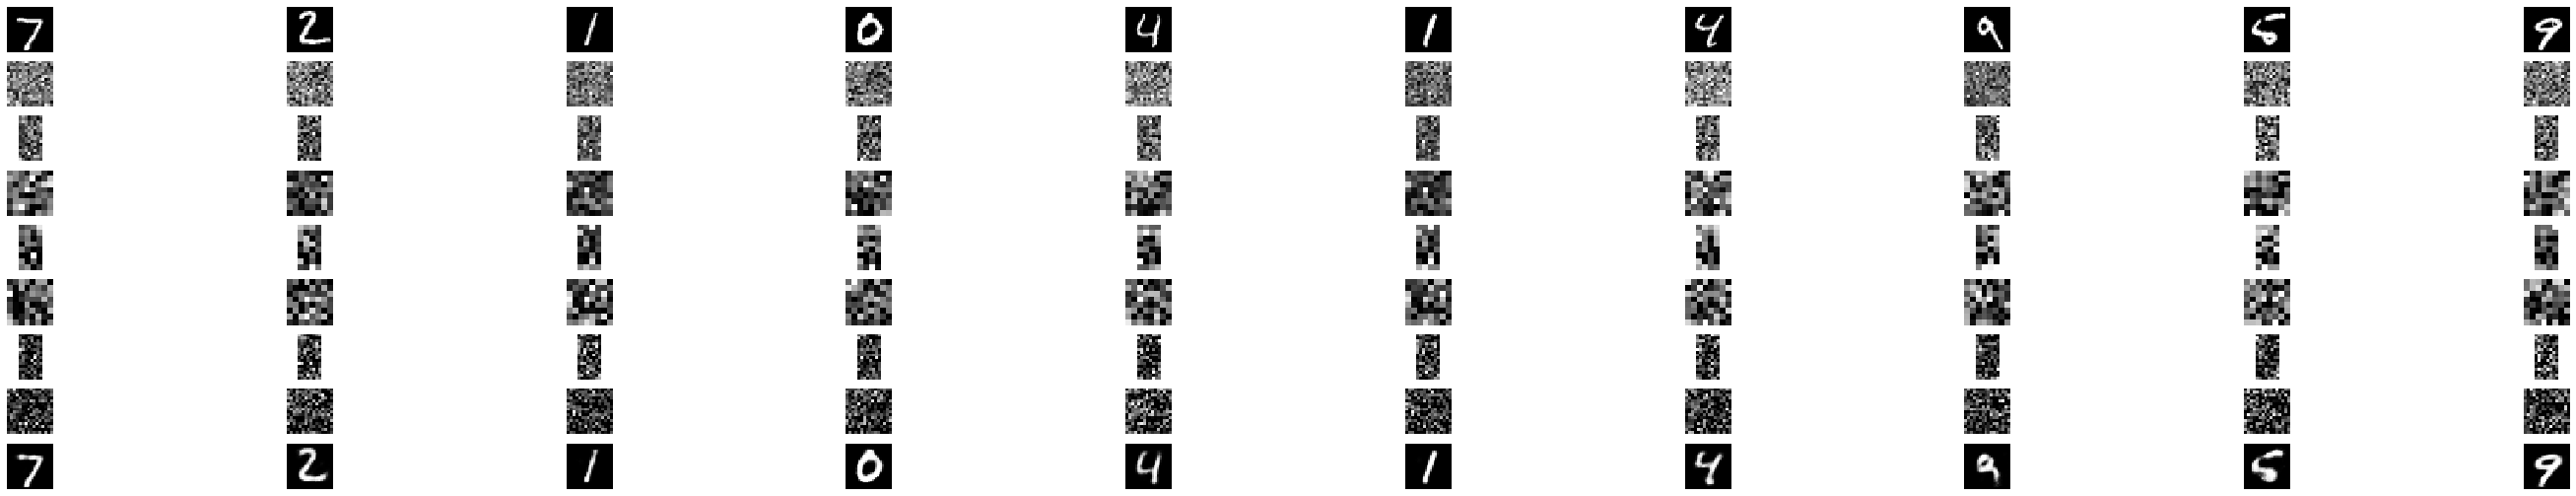

In [0]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(50, 9))
for i in range(n):
  
    ax = plt.subplot(9, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + n)
    plt.imshow(encoded_imgs_1[i].reshape(16,16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 2*n)
    plt.imshow(encoded_imgs_2[i].reshape(16,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 3*n)
    plt.imshow(encoded_imgs_3[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 4*n)
    plt.imshow(encoded_imgs_4[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 5*n)
    plt.imshow(decoded_imgs_1[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 6*n)
    plt.imshow(decoded_imgs_2[i].reshape(16,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 7*n)
    plt.imshow(decoded_imgs_3[i].reshape(16,16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(9, n, i + 1 + 8*n)
    plt.imshow(decoded_imgs_4[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()